In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os
import math


In [2]:
file = r'D:\UNI\MILJOETEK\4. semester\Calculations\Data.xlsx'
sheet = 'EoL DU'
save_dir = r'D:\UNI\MILJOETEK\4. semester\Calculations\Hospital_CDU_MDU'
# Create the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)
data = pd.read_excel(file, sheet_name=sheet)
data.head()


,Process,CDU PME,CDU AIC,CDU AAC,MDU PME,MDU AAI,MDU AAC
0,DU,22395.391774,22395.391774,22395.391774,3059.943402,3059.943402,3059.943402
1,EoL DU,-2015.407601,-12900.736395,-13006.683140,-255.233788,-1343.766609,-1354.361283


In [3]:
col_to_plot_len = len(data.columns) - 1
col_to_plot = data.columns
col_to_plot = col_to_plot[1:]
col_to_plot 


Index(['CDU PME', 'CDU AIC', 'CDU AAC', 'MDU PME', 'MDU AAI', 'MDU AAC'], dtype='object')

In [4]:
plot_legend = ['Net impact', 'Prod.', 'EoL']

C:\Users\rwint\AppData\Local\Temp\ipykernel_16928\596960992.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab20')


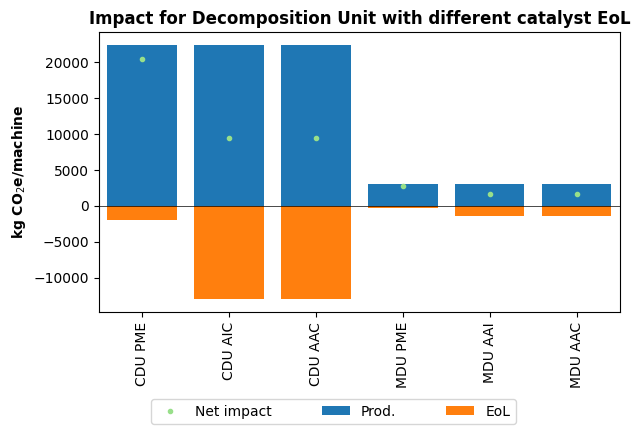

In [5]:
cmap = plt.cm.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1.5, 12)]

bottom_positive = np.zeros(len(data['CDU PME']))
bottom_negative = np.zeros(len(data['CDU PME']))

fig, ax = plt.subplots()
sum_values = np.zeros(col_to_plot_len)  # Array to store the sum of each bar
x = np.arange(col_to_plot_len)
for k in range(col_to_plot_len):
    scenario = col_to_plot[k]
    for i, (share, item) in enumerate(zip(data[scenario], data['Process'])):
        if share >= 0:
            ax.bar(x[k], share, bottom=bottom_positive[i], label=item, color=colors[i])
            bottom_positive[i] += share
        else:
            ax.bar(x[k], share, bottom=bottom_negative[i], label=item, color=colors[i])
            bottom_negative[i] += share
        sum_values[k] += share  # Accumulate the sum for each scenario
    bottom_positive = np.zeros(len(data['CDU PME']))
    bottom_negative = np.zeros(len(data['CDU PME']))

ax.plot(x, sum_values,'.', color=colors[2], label='Total')  # 'ko' for black dots

index = np.arange(col_to_plot_len)
ax.set_xticks(index)
ax.set_xticklabels(col_to_plot)
plt.xticks(rotation=90)
plt.ylabel('kg CO$_2$e/machine', weight='bold')
plt.title('Impact for Decomposition Unit with different catalyst EoL', weight='bold')

plt.xlim(-0.5,5.5)


ax.legend(plot_legend, bbox_to_anchor=(0.1, -0.4, 0.7, 0.2), loc="lower left", mode="expand", borderaxespad=0, ncol=3)
ax.hlines(0,-0.5,5.5, color='k',linewidth=.5)

# Show the plot
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'EoL_DU_comparison.jpg'), bbox_inches='tight')
plt.show()